In [ ]:
import sys
print ('Running in colab:', 'google.colab' in sys.modules)
if 'google.colab' in sys.modules:
  folderloc = "drive/MyDrive/CMPE 255/"
else:
  # folderloc = "C:\\Users\\Reg\\Documents\\SJSU\\FALL_2022\\"
  folderloc = "C:\\Users\\rgana\\Documents\\SJSU\\FALL_2022\\"


Running in colab: False


#Import File

In [ ]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from PIL import Image
from sklearn.neighbors import KNeighborsClassifier,RadiusNeighborsClassifier
from sklearn import tree
from sklearn import ensemble
import time
np.set_printoptions(linewidth=115)

In [ ]:
input_file = folderloc + "A_Z Handwritten Data.csv"
df = pd.read_csv(input_file, header = 0)
# backup_df = df.copy()

In [ ]:
import multiprocessing
multiprocessing.cpu_count()

12

In [ ]:
#code split
# train, test = model_selection.train_test_split(df, test_size=0.20)
# train.to_csv(folderloc+'train.csv',index = False)
# test.to_csv(folderloc+'test.csv', index = False)


<bound method NDFrame.head of          0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.639  0.640  \
0        0    0    0    0    0    0    0    0    0    0  ...      0      0   
1        0    0    0    0    0    0    0    0    0    0  ...      0      0   
2        0    0    0    0    0    0    0    0    0    0  ...      0      0   
3        0    0    0    0    0    0    0    0    0    0  ...      0      0   
4        0    0    0    0    0    0    0    0    0    0  ...      0      0   
...     ..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
372445  25    0    0    0    0    0    0    0    0    0  ...      0      0   
372446  25    0    0    0    0    0    0    0    0    0  ...      0      0   
372447  25    0    0    0    0    0    0    0    0    0  ...      0      0   
372448  25    0    0    0    0    0    0    0    0    0  ...      0      0   
372449  25    0    0    0    0    0    0    0    0    0  ...      0      0   

        0.641  0.642  0.643  0.64

## Stratified Code Split

In [ ]:
#stratified code split
df_data = df.iloc[:,1:].values
df_class = df.iloc[:,0].values
#n_splits is how many times the for loop for .split will run
#each split is independent of each other and will generate indices needed to make the train and test sets
## This is useful for rerunning tests/models with different train/test set combinations
#the train and test set will have the same distributions of labels(classes/features/etc) from the original dataset
splitter = model_selection.StratifiedShuffleSplit(n_splits=1,test_size=0.2)
for train_ids, test_ids in splitter.split(df_data, df_class):
  df_train = df.iloc[train_ids,:]
  df_test = df.iloc[test_ids,:]
  # X_train, y_train = df_data[train_ids], df_class[train_ids]
  # X_test, y_test = df_data[test_ids], df_class[test_ids]

### Stratified Distribution Comparisons

In [ ]:
#load stratified data form shared drive
df_train = pd.read_csv(folderloc + "train_stratified.csv",header = 0)
df_test = pd.read_csv(folderloc + "test_stratified.csv",header = 0)

df_test_mat = df_test.iloc[:,1:].values
df_test_mat_class = df_test.iloc[:,0].values
df_train_mat = df_train.iloc[:,1:].values
df_train_mat_class = df_train.iloc[:,0].values


In [ ]:
# code to clean df
del df_train
del df_test

In [ ]:

print("Difference in distrubtion between dataset and Train(stratified) labels : \n",df_train["0"].value_counts(sort=False,normalize=True).sort_index()-df["0"].value_counts(sort=False,normalize=True).sort_index())


print("Difference in distrubtion between dataset and Test(stratified) labels: \n",df_test["0"].value_counts(sort=False,normalize=True).sort_index()-df["0"].value_counts(sort=False,normalize=True).sort_index())
##Double check my work
print("Difference in distrubtion between dataset and dataset labels(expected 0s): \n",df["0"].value_counts(sort=False,normalize=True).sort_index()-df["0"].value_counts(sort=False,normalize=True).sort_index())

# unique, counts = np.unique(y_train,return_counts=True)
# total = counts.sum()
# print(total)
# print("Distribution of y_train: ",dict(zip(unique, counts/total * 100)))
# unique, counts = np.unique(y_test,return_counts=True)
# total = counts.sum()
# print("Distribution of y_test: ",dict(zip(unique, counts/total * 100)))
# print("Distribution of dataset labels: \n",df["0"].value_counts(sort=False,normalize=True))


Difference in distrubtion between dataset and Train(stratified) labels : 
 0    -6.712310e-07
1    -1.342462e-06
2    -6.712310e-07
3    -6.712310e-07
4     0.000000e+00
5    -1.342462e-06
6     1.342462e-06
7    -1.342462e-06
8     0.000000e+00
9    -1.342462e-06
10   -1.342462e-06
11    6.712310e-07
12    6.712310e-07
13    0.000000e+00
14    0.000000e+00
15    6.712310e-07
16    1.342462e-06
17    6.712310e-07
18   -6.712310e-07
19    0.000000e+00
20    2.013693e-06
21    1.342462e-06
22   -6.712310e-07
23    1.342462e-06
24   -6.712310e-07
25    6.712310e-07
Name: 0, dtype: float64
Difference in distrubtion between dataset and Test(stratified) labels: 
 0     0.000003
1     0.000005
2     0.000003
3     0.000003
4     0.000000
5     0.000005
6    -0.000005
7     0.000005
8     0.000000
9     0.000005
10    0.000005
11   -0.000003
12   -0.000003
13    0.000000
14    0.000000
15   -0.000003
16   -0.000005
17   -0.000003
18    0.000003
19    0.000000
20   -0.000008
21   -0.000005
22  

### Saving Stratified Train/Test

In [ ]:

df_train.to_csv(folderloc+'train_stratified.csv',index = False)
df_test.to_csv(folderloc+'test_stratified.csv', index = False)

# Make train/test using a balanced train/test

In [ ]:
#Single train/test stratified set using train_test_split
alphabet = []
train, test = model_selection.train_test_split(df, test_size=0.20)
train.to_csv(folderloc+'train.csv',index = False)
test.to_csv(folderloc+'test.csv', index = False)

#Import Group Train/Test and view sample data

In [ ]:
input_train = pd.read_csv(folderloc + "train.csv",header = 0)


In [ ]:
input_test = pd.read_csv(folderloc + "test.csv",header = 0)

## Origianal Train/Test Distribution Comparison

In [ ]:
#Check distribution

print("Difference in distrubtion between dataset and Train(not stratified) labels: \n",input_train["0"].value_counts(sort=False,normalize=True).sort_index()-df["0"].value_counts(sort=False,normalize=True).sort_index())
print("Difference in distrubtion between dataset and Test labels(not stratified): \n",input_test["0"].value_counts(sort=False,normalize=True).sort_index()-df["0"].value_counts(sort=False,normalize=True).sort_index())

Difference in distrubtion between dataset and Train(not stratified) labels: 
 0    -0.000071
1     0.000113
2    -0.000075
3    -0.000165
4     0.000275
5     0.000022
6     0.000162
7    -0.000179
8     0.000013
9     0.000076
10   -0.000075
11    0.000108
12   -0.000113
13   -0.000175
14    0.000020
15    0.000350
16   -0.000160
17   -0.000191
18    0.000144
19    0.000023
20   -0.000028
21   -0.000116
22    0.000100
23    0.000035
24   -0.000075
25   -0.000019
Name: 0, dtype: float64
Difference in distrubtion between dataset and Test labels(not stratified): 
 0     0.000285
1    -0.000451
2     0.000298
3     0.000660
4    -0.001101
5    -0.000089
6    -0.000650
7     0.000717
8    -0.000054
9    -0.000303
10    0.000301
11   -0.000432
12    0.000454
13    0.000698
14   -0.000081
15   -0.001399
16    0.000639
17    0.000763
18   -0.000575
19   -0.000094
20    0.000113
21    0.000464
22   -0.000400
23   -0.000140
24    0.000298
25    0.000078
Name: 0, dtype: float64


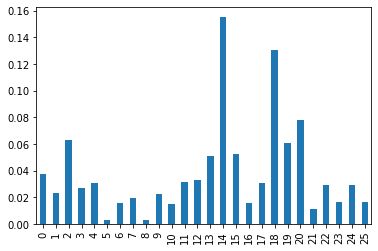

In [ ]:
#Distribution of train set
input_train["0"].value_counts(sort=False,normalize=True).sort_index().plot(kind='bar')

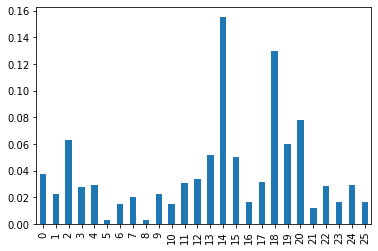

In [ ]:
#Distribution of test set
input_test["0"].value_counts(sort=False,normalize=True).sort_index().plot(kind='bar')

# Testing Display Data

In [ ]:
row = 0
test_mat_1 = input_test.iloc[0:2,1:].values
test_mat_1_label = input_test.iloc[0:1,0]
print(test_mat_1)
# print(test_mat_1_label)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
test_mat_1 = np.resize(test_mat_1, (2,28, 28))
print(test_mat_1)
im = Image.fromarray(test_mat_1[0].astype(np.uint8))
im

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [ ]:
input_test.info()
input_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74490 entries, 0 to 74489
Columns: 785 entries, 0 to 0.648
dtypes: int64(785)
memory usage: 446.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297960 entries, 0 to 297959
Columns: 785 entries, 0 to 0.648
dtypes: int64(785)
memory usage: 1.7 GB


# Create regular train/test matrices

In [ ]:
test_mat = input_test.iloc[:,1:].values
test_mat_class = input_test.iloc[:,0].values

In [ ]:
train_mat = input_train.iloc[:,1:].values

In [ ]:
train_mat_class = input_train.iloc[:,0].values

In [ ]:
train_mat[0,:]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        21, 117, 117, 117, 167, 255, 255,  93,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,  35,  96, 200, 255, 255, 255, 255, 255, 255, 229,  44,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 138, 229, 255, 255, 255, 255, 255, 255, 25

#K Nearest Neighbor Classifier

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=1,n_jobs=-1)

In [ ]:
neigh.fit(train_mat, train_mat_class)

KNeighborsClassifier(n_jobs=-1, n_neighbors=1)

In [ ]:
pred = neigh.predict(test_mat)
# print(pred)

## Scoring KNN

In [ ]:
print(neigh.score(test_mat,test_mat_class))

0.9864411330379916


# Weight Based K Nearest Neighbor 

In [ ]:
wneigh = KNeighborsClassifier(n_neighbors=6,weights='distance',n_jobs=-1)

In [ ]:
wneigh.fit(df_train_mat,df_train_mat_class)

KNeighborsClassifier(n_jobs=-1, n_neighbors=6, weights='distance')

In [ ]:
pred = wneigh.predict(df_test_mat)
print(pred)

[18 22 15 ... 13 18 13]


In [ ]:
from sklearn.metrics import classification_report
alphabets = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
print(classification_report(df_test_mat_class, pred,target_names=alphabets))

              precision    recall  f1-score   support

           A       0.98      0.99      0.99      2774
           B       1.00      0.95      0.97      1734
           C       0.98      0.99      0.98      4682
           D       0.98      0.97      0.97      2027
           E       1.00      0.97      0.98      2288
           F       0.97      0.90      0.94       233
           G       0.99      0.96      0.98      1152
           H       0.98      0.97      0.97      1444
           I       1.00      0.90      0.95       224
           J       0.97      0.96      0.97      1699
           K       0.98      0.96      0.97      1121
           L       0.97      0.99      0.98      2317
           M       1.00      0.97      0.98      2467
           N       0.97      0.99      0.98      3802
           O       0.99      1.00      0.99     11565
           P       0.96      1.00      0.98      3868
           Q       0.99      0.91      0.95      1162
           R       0.99    

## Test Optimization

In [ ]:
for i in range(3,7):
  wneigh = KNeighborsClassifier(n_neighbors=i,weights='distance',n_jobs=-1)
  wneigh.fit(train_mat,train_mat_class)
  print("Neighbor=",i,",",wneigh.score(test_mat,test_mat_class))

Neighbor= 3 , 0.9849241508927373
Neighbor= 4 , 0.9856490804134783
Neighbor= 5 , 0.9855416834474426
Neighbor= 6 , 0.9856893542757417


### Optimization of Stratified

In [ ]:
for i in range(3,8):
  wneigh = KNeighborsClassifier(n_neighbors=i,weights='distance',n_jobs=-1)
  wneigh.fit(df_train_mat,df_train_mat_class)
  print("Neighbor=",i,",",wneigh.score(df_test_mat,df_test_mat_class))

Neighbor= 3 , 0.9839710028191704
Neighbor= 4 , 0.9847630554436837
Neighbor= 5 , 0.9847496308229292
Neighbor= 6 , 0.9848704524097194
Neighbor= 7 , 0.9840247013021882


## Scoring Weight KNN

In [ ]:
print(wneigh.score(test_mat,test_mat_class))

0.9855416834474426


## Grid Search KNN Distance Optimization

In [ ]:
#Distance Scoring Nearest Neighbor
wneigh = KNeighborsClassifier(weights='distance',n_jobs=-1)

from sklearn.model_selection import GridSearchCV

#Grid search to find best k value
param_grid = {'n_neighbors': np.arange(3,8)}
grid = GridSearchCV(wneigh,param_grid,cv=5)
grid.fit(df_train_mat,df_train_mat_class)

GridSearchCV(cv=5,
             estimator=KNeighborsClassifier(n_jobs=-1, weights='distance'),
             param_grid={'n_neighbors': array([3, 4, 5, 6, 7])})

In [ ]:
grid.best_score_

0.9775238287018393

In [ ]:
grid.best_params_

{'n_neighbors': 6}

# Radius Based Nearest Neighbor

In [ ]:
rneigh = RadiusNeighborsClassifier(n_jobs=-1)

In [ ]:
rneigh.fit(train_mat,train_mat_class)

RadiusNeighborsClassifier(n_jobs=-1)

In [ ]:
# pred = rneigh.predict(test_mat)
# print(pred)

## Scoring Radius Based Nearest Neighbor

In [ ]:
print(rneigh.score(test_mat,test_mat_class))
#in progress

ValueError: ignored

# Running Timing and Scoring for All Models


In [ ]:
import csv

models = [
          [KNeighborsClassifier(n_neighbors=5,n_jobs=-1),"KNN, K=5"],
          [KNeighborsClassifier(n_neighbors=6,weights='distance',n_jobs=-1),"KNN, Distance K=6"],
          [tree.DecisionTreeClassifier(criterion="entropy"),"Decision Tree, criterion=entropy"],
          [tree.DecisionTreeClassifier(criterion="gini"),"Decision Tree, criterion=gini"],
          [ensemble.RandomForestClassifier(n_estimators=110,n_jobs=-1),"Random Forest, n estimator = 110"],
          [ensemble.RandomForestClassifier(n_estimators=150,n_jobs=-1),"Random Forest, n estimator = 150"]
          ]

#stratified code split should be from the training data
#df = training data from original train test split
df_data = df.iloc[:,1:].values #data
df_class = df.iloc[:,0].values #features

#sets up n_splits 
splitter = model_selection.StratifiedShuffleSplit(n_splits=5,test_size=0.2)
for train_ids, test_ids in splitter.split(df_data, df_class):
  df_train = df.iloc[train_ids,:]
  df_test = df.iloc[test_ids,:]

  column_name = ["Model","Fit Time","Score Time","Score"]
  model_data = [column_name]
  for model in models:
    model_spec = model[0]

    start = time.time()
    model_spec.fit(df_train_mat,df_train_mat_class)
    stop = time.time()

    fit_time = stop - start

    start = time.time()
    model_score = model_spec.score(df_test_mat,df_test_mat_class)
    stop = time.time()

    score_time = stop-start
    #store info for future use
    model_data.append([model[1],fit_time,score_time,model_score])
    print(model[1],"|",fit_time,"|",score_time,"|",model_score)



KNN, K=5 | 0.016500234603881836 | 587.3760001659393 | 0.9593905222177473
KNN, Distance K=6 | 0.01600503921508789 | 579.8799948692322 | 0.9848704524097194
Decision Tree, criterion=entropy | 66.1510078907013 | 0.1304924488067627 | 0.9587058665592697
Decision Tree, criterion=gini | 72.73250102996826 | 0.12549877166748047 | 0.9551886159216002
Random Forest, n estimator = 110 | 36.76049733161926 | 1.0874989032745361 | 0.9878238689757014
Random Forest, n estimator = 150 | 49.19368314743042 | 1.4444966316223145 | 0.9880655121492817


In [ ]:
  model_data.append([model[1],fit_time,score_time,model_score])
  

In [ ]:
print(model_data)

[['KNN, K=5', -0.016499996185302734, -595.9049072265625, 0.9593905222177473]]


In [ ]:
with open(folderloc + "model_data.csv", "w") as f:
  writer = csv.writer(f)
  writer.writerows(model_data)

In [ ]:
#stratified code split
df_data = df.iloc[:,1:].values
df_class = df.iloc[:,0].values
#n_splits is how many times the for loop for .split will run
#each split is independent of each other and will generate indices needed to make the train and test sets
## This is useful for rerunning tests/models with different train/test set combinations
#the train and test set will have the same distributions of labels(classes/features/etc) from the original dataset
splitter = model_selection.StratifiedShuffleSplit(n_splits=1,test_size=0.2)
for train_ids, test_ids in splitter.split(df_data, df_class):
  df_train = df.iloc[train_ids,:]
  df_test = df.iloc[test_ids,:]
  # X_train, y_train = df_data[train_ids], df_class[train_ids]
  # X_test, y_test = df_data[test_ids], df_class[test_ids]

In [ ]:
models = [
          [KNeighborsClassifier(n_neighbors=5,n_jobs=-1,algorithm="ball_tree"),"KNN BT, K=5"],
          [KNeighborsClassifier(n_neighbors=5,n_jobs=-1,algorithm="kd_tree"),"KNN KD, K=5"],
          # [KNeighborsClassifier(n_neighbors=6,weights='distance',n_jobs=-1,algorithm="kd_tree"),"KNN KD, Distance K=6"],
          
          # [KNeighborsClassifier(n_neighbors=6,weights='distance',n_jobs=-1,algorithm="ball_tree"),"KNN BT, Distance K=6"]
          ]

column_name = ["Model","Fit Time","Score Time","Score"]
model_data = [column_name]
for model in models:
  model_spec = model[0]

  start = time.time()
  model_spec.fit(df_train_mat,df_train_mat_class)
  stop = time.time()

  fit_time = stop - start

  start = time.time()
  model_score = model_spec.score(df_test_mat,df_test_mat_class)
  stop = time.time()

  score_time = stop-start
  #store info for future use
  model_data.append([model[1],fit_time,score_time,model_score])
  print(model[1],"|",fit_time,"|",score_time,"|",model_score)

# Other stuff below for testing

In [ ]:
input_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297960 entries, 0 to 297959
Columns: 785 entries, 0 to 0.648
dtypes: int64(785)
memory usage: 1.7 GB


In [ ]:
df.info()

NameError: ignored

In [ ]:
df.iloc[:,0].value_counts()

14    57825
18    48419
20    29008
2     23409
19    22495
15    19341
13    19010
0     13869
12    12336
11    11586
17    11566
4     11440
24    10859
22    10784
3     10134
1      8668
9      8493
7      7218
23     6272
25     6076
16     5812
6      5762
10     5603
21     4182
5      1163
8      1120
Name: 0, dtype: int64

In [ ]:
row1 = df.iloc[16290,:].values
row1 = row1[1:785]

print(row1)
print(type(row1))
print(row1.shape)


[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  20 114 224   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  10  87 188 226 255   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  44 167 177  51 223 137   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   5 113 206 118   0  83 255  20   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  25 142 206  44   0   0 191 102   1

In [ ]:
mat1 = np.resize(row1, (28, 28))

In [ ]:

print(mat1)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  20 114 224   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  10  87 188 226 255   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  44 167 177  51 223 137   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   5 113 206 118   0  83 255  20   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  25 142 206  44   

In [ ]:
im = Image.fromarray(mat1.astype(np.uint8))

In [ ]:
im

In [ ]:
!pip install pytesseract
!sudo apt install tesseract-ocr
from pytesseract import image_to_string
from PIL import Image



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 5 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr a

In [ ]:
backup_im = im
im

In [ ]:
folderloc = "/drive/Shareddrives/CMPE 255 - Team Project/"


In [ ]:
from PIL import ImageOps, ImageEnhance

In [ ]:
im = backup_im

In [ ]:
im = im.resize((128,128))
im = ImageOps.invert(im)
enhancer = ImageEnhance.Sharpness(im)
im = enhancer.enhance(10)

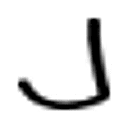

In [ ]:
im

In [ ]:
text = image_to_string("/content/drive/Shareddrives/CMPE 255 - Team Project/A.png",config=(" --psm 10"))
print(text)

A

